# Перший рівень

imports

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
import timeit as ti
from datetime import datetime

Downloading dataset

In [30]:
household_power_consumption = fetch_ucirepo(id=235)
X = household_power_consumption.data.features
df = pd.DataFrame(X)
df.to_csv('household_power_consumption.csv', index=False)

df = pd.read_csv('household_power_consumption.csv')
df = df.dropna()

print(df)

k:\Visual Studio Code\CRDF\Python\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)
C:\Users\Сергей\AppData\Local\Temp\ipykernel_9900\3273347499.py:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.csv')


               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

Data cleaning

In [31]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

for column in df.columns[2:-1]:
    df[column] = pd.to_numeric(df[column], errors = 'coerce')

df.drop(['Date', 'Time'], axis=1, inplace=True)

C:\Users\Сергей\AppData\Local\Temp\ipykernel_9900\2632478488.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


Showing DataFrame and Creating Numpy array

In [63]:
npy = np.array(X)

def remove_rows(npy):
    mask = np.any(npy == '?', axis=1)
    return npy[~mask]

npy= remove_rows(npy)

npy[:, 2:9] = npy[:, 2:9].astype(float)

def combine_date_time(date_str, time_str):
    dt_str = f'{date_str} {time_str}'
    dt_obj = datetime.strptime(dt_str, '%d/%m/%Y %H:%M:%S')
    timestamp_obj = datetime.timestamp(dt_obj)
    return datetime.fromtimestamp(timestamp_obj)

npy = np.array([[row[2], row[3], row[4], row[5], row[6], row[7], row[8], combine_date_time(row[0], row[1])] for row in npy])

print(df)
print(npy)

         Global_active_power  Global_reactive_power  Voltage  \
0                      4.216                  0.418   234.84   
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
4                      3.666                  0.528   235.68   
...                      ...                    ...      ...   
2075254                0.946                  0.000   240.43   
2075255                0.944                  0.000   240.00   
2075256                0.938                  0.000   239.82   
2075257                0.934                  0.000   239.70   
2075258                0.932                  0.000   239.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0                    18.4             0.0             1.0            17.0   
1                    23.0             0.0             1.0            16.0   


Task 1

In [65]:
def task1_df():
    return df[df['Global_active_power'] > 5]

def task1_npy():
    return npy[npy[:, 0] > 5]

print('Filtered DataFrame:\n', task1_df())
print("Execution time:", ti.timeit(lambda: task1_df(), number=1))

print('Filtered Numpy array:\n', task1_npy())
print("Execution time:", ti.timeit(lambda: task1_npy(), number=1))

Filtered DataFrame:
          Global_active_power  Global_reactive_power  Voltage  \
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
11                     5.412                  0.470   232.78   
12                     5.224                  0.478   232.99   
...                      ...                    ...      ...   
2069356                5.408                  0.150   231.50   
2069357                5.528                  0.144   232.48   
2071586                5.172                  0.050   235.18   
2071587                5.750                  0.000   234.40   
2072997                5.074                  0.240   238.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1                    23.0             0.0             1.0            16.0   
2                    23.0             0.0             2.

Task 2

In [66]:
def task2_df():
    return df[df['Voltage'] > 235]

def task2_npy():
    return npy[npy[:, 2] > 235]

print('Filtered DataFrame:\n', task2_df())
print("Execution time:", ti.timeit(lambda: task2_df(), number=1))

print('Filtered Numpy array:\n', task2_npy())
print("Execution time:", ti.timeit(lambda: task2_npy(), number=1))

Filtered DataFrame:
          Global_active_power  Global_reactive_power  Voltage  \
4                      3.666                  0.528   235.68   
5                      3.520                  0.522   235.02   
6                      3.702                  0.520   235.09   
7                      3.700                  0.520   235.22   
14                     4.054                  0.422   235.24   
...                      ...                    ...      ...   
2075254                0.946                  0.000   240.43   
2075255                0.944                  0.000   240.00   
2075256                0.938                  0.000   239.82   
2075257                0.934                  0.000   239.70   
2075258                0.932                  0.000   239.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
4                    15.8             0.0             1.0            17.0   
5                    15.0             0.0             2.

Task 3

In [67]:
def task3_df():
    return df[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20) & (df['Sub_metering_2'] > df['Sub_metering_3'])]

def task3_npy():
    return npy[(npy[:, 3] >= 19) & (npy[:, 3] <= 20) & (npy[:, 5] > npy[:, 6])]

print('Filtered DataFrame:\n', task3_df())
print("Execution time:", ti.timeit(lambda: task3_df(), number=1))

print('Filtered Numpy array:\n', task3_npy())
print("Execution time:", ti.timeit(lambda: task3_npy(), number=1))

Filtered DataFrame:
          Global_active_power  Global_reactive_power  Voltage  \
45                     4.464                  0.136   234.66   
460                    4.582                  0.258   238.08   
464                    4.618                  0.104   239.61   
475                    4.636                  0.140   237.37   
476                    4.634                  0.152   237.17   
...                      ...                    ...      ...   
2071589                4.666                  0.000   235.72   
2071590                4.694                  0.000   236.78   
2071591                4.602                  0.000   237.08   
2071592                4.536                  0.000   237.03   
2071593                4.626                  0.000   236.78   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
45                   19.0             0.0            37.0            16.0   
460                  19.6             0.0            13.

Task 4

In [70]:
def task4_df():
    random_df = df.sample(n=500000, replace=False)
    means = random_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return means

def task4_npy():
    random_npy = npy[np.random.choice(npy.shape[0], size=500000, replace=False), :]
    means = np.mean(random_npy[:, 4:7], axis=0)
    return means

print('DataFrame means:\n', task4_df())
print("Execution time:", ti.timeit(lambda: task4_df(), number=1))

print('Numpy array means:\n', task4_npy())
print("Execution time:", ti.timeit(lambda: task4_npy(), number=1))

DataFrame means:
 Sub_metering_1    1.118960
Sub_metering_2    1.290182
Sub_metering_3    6.447196
dtype: float64
Execution time: 0.15683809999609366
Numpy array means:
 [1.1165 1.291318 6.458112]
Execution time: 0.4434307999908924


Task 5

In [64]:
def task5_df():
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    filtered_df = df[(df['DateTime'].dt.time > pd.to_datetime('18:00:00').time()) & (df['Global_active_power'] > 6) & (df['Sub_metering_2'] > df['Sub_metering_1']) & (df['Sub_metering_2'] > df['Sub_metering_3'])]

    selected_rows = pd.concat([filtered_df.iloc[:len(filtered_df) // 2:3], filtered_df.iloc[len(filtered_df) // 2::4]])

    return selected_rows

def task5_npy():
    npy[:, 7] = np.array([pd.to_datetime(val) for val in npy[:, 7]])
    filtered_npy = npy[(npy[:, 7].astype('datetime64[s]').astype(int) % 86400 > 18 * 3600) & (npy[:, 0].astype(float) > 6) & (npy[:, 5].astype(float) > npy[:, 4].astype(float)) & (npy[:, 5].astype(float) > npy[:, 6].astype(float))]

    selected_rows = np.concatenate([filtered_npy[:len(filtered_npy) // 2:3], filtered_npy[len(filtered_npy) // 2::4]])

    return selected_rows

print('DataFrame:\n', task5_df())
print("Execution time:", ti.timeit(lambda: task5_df(), number=1))

print('Numpy array:\n', task5_npy())
print("Execution time:", ti.timeit(lambda: task5_npy(), number=1))

DataFrame:
          Global_active_power  Global_reactive_power  Voltage  \
41                     6.052                  0.192   232.93   
44                     6.308                  0.116   232.25   
17494                  6.386                  0.374   236.63   
17498                  8.088                  0.262   235.50   
17501                  7.230                  0.152   235.22   
...                      ...                    ...      ...   
2066467                6.830                  0.394   229.39   
2066471                6.784                  0.364   228.38   
2066475                6.362                  0.372   229.83   
2066479                6.324                  0.376   229.93   
2066485                6.210                  0.174   228.82   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
41                   26.2             0.0            37.0            17.0   
44                   27.0             0.0            36.0        

# Другий рівень

imports

In [45]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

Downloading Dataset about Horse Colics

In [46]:
horse_colic = fetch_ucirepo(id=47)
X = horse_colic.data.features
df = pd.DataFrame(X)
df.to_csv('horse_colic.csv', index=False)
df = pd.read_csv('horse_colic.csv')



npy = np.array(X)

1. Поборотися із зниклими даними.

In [47]:
# Якщо прибрати всі NaN, то залишиться всього 30 рядків, але якщо подивитись на стовпці з пропущеними занченнями, то можна побачити,
# що вони не сильно відрізняються один від одного, тому просто замінимо їх на поереднє відоме.

df = df.fillna(method='ffill')
df = df.dropna()
print(df)



np.set_printoptions(suppress=True, precision=1, floatmode='fixed', linewidth=100)

def fill_rows(npy):
    temp_array = np.full(npy.shape[1], np.nan)

    for row in npy:
        for i, val in enumerate(row):
            if not np.isnan(val):
                temp_array[i] = val
            else:
                row[i] = temp_array[i]
fill_rows(npy)

npy = npy.astype(float)

print(npy[5])
print(npy)

     surgery  age  hospital_number  rectal_temperature  pulse  \
3        1.0    9          5290409                39.1  164.0   
4        2.0    1           530255                37.3  104.0   
5        2.0    1           528355                37.3  104.0   
6        1.0    1           526802                37.9   48.0   
7        1.0    1           529607                37.9   60.0   
..       ...  ...              ...                 ...    ...   
363      2.0    1           529695                38.6   60.0   
364      2.0    1           528452                37.8   42.0   
365      1.0    1           534783                38.0   60.0   
366      2.0    1           528926                38.0   42.0   
367      2.0    1           530670                37.6   88.0   

     respiratory_rate  temperature_of_extremities  peripheral_pulse  \
3                84.0                         4.0               1.0   
4                35.0                         4.0               1.0   
5     

C:\Users\Сергей\AppData\Local\Temp\ipykernel_11740\1397121824.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


2. Пронормувати вибраний датасет або стандартизувати його

In [49]:
# Нормалізуємо стовпець total_protein, бо він має широкий спектр значень.

min_total_protein = df['total_protein'].min()
max_total_protein = df['total_protein'].max()

df['total_protein_normalized'] = (df['total_protein'] - min_total_protein) / (max_total_protein - min_total_protein)

print(df['total_protein_normalized'])



np.set_printoptions(suppress=True, precision=6, floatmode='fixed', linewidth=100)
min_total_protein = npy[:, 19].astype(float).min()
max_total_protein = npy[:, 19].astype(float).max()

npy_normalized = (npy[:, 19].astype(float) - min_total_protein) / (max_total_protein - min_total_protein)

npy = np.column_stack((npy, npy_normalized))


print(npy[:, -1])

3      0.045508
4      0.047841
5      0.047841
6      0.043174
7      0.058343
         ...   
363    0.031505
364    0.033839
365    0.719953
366    0.029172
367    0.031505
Name: total_protein_normalized, Length: 365, dtype: float64
[0.059510 0.953326 0.039673 0.045508 0.047841 0.047841 0.043174 0.058343 0.033839 0.033839 0.031505
 0.052509 0.043174 0.032672 0.906651 0.040840 0.052509 0.052509 0.043174 0.063011 0.032672 0.040840
 0.045508 0.778296 0.719953 0.719953 0.043174 0.025671 0.025671 0.848308 0.049008 0.057176 0.038506
 0.061844 0.038506 0.059510 0.031505 0.894982 0.038506 0.038506 0.037340 0.060677 0.043174 0.743291
 0.766628 0.037340 0.049008 0.037340 0.037340 0.025671 0.067678 0.067678 0.051342 0.036173 0.056009
 0.056009 0.039673 0.051342 0.030338 0.030338 0.039673 0.051342 0.054842 0.918320 0.049008 0.801634
 0.824971 0.045508 0.045508 0.035006 0.050175 0.030338 0.030338 0.049008 0.018670 0.626604 0.754959
 0.859977 0.030338 0.065344 0.036173 0.036173 0.028005 0.052509 

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

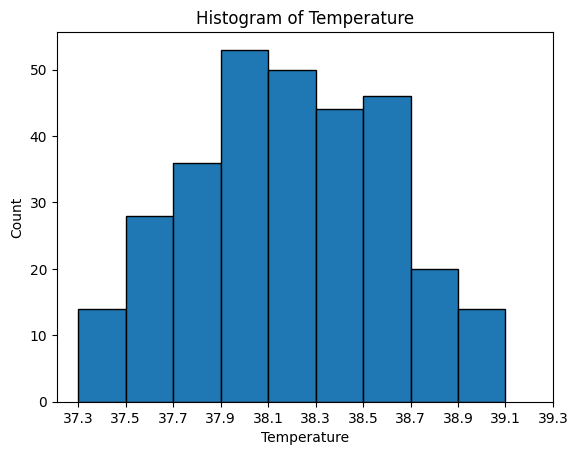

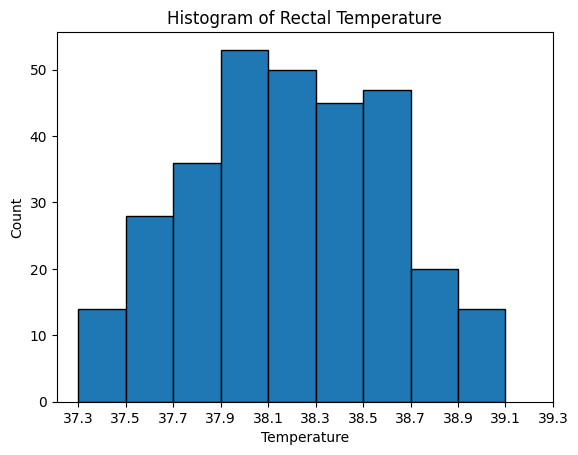

In [50]:
ranges = [37.3, 37.5, 37.7, 37.9, 38.1, 38.3, 38.5, 38.7, 38.9, 39.1]

plt.hist(df['rectal_temperature'], bins=ranges, edgecolor='black')

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Temperature')
tick_values = np.arange(min(ranges), max(ranges) + 0.2, 0.2)
plt.xticks(tick_values)

plt.show()




hist, bins = np.histogram(npy[:, 3], bins=ranges)

plt.hist(npy[:, 3], bins=ranges, edgecolor='black')

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Rectal Temperature')
tick_values = np.arange(min(ranges), max(ranges) + 0.2, 0.2)
plt.xticks(tick_values)

plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

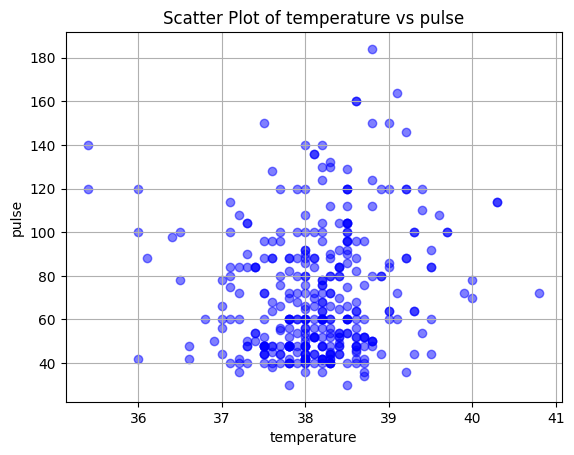

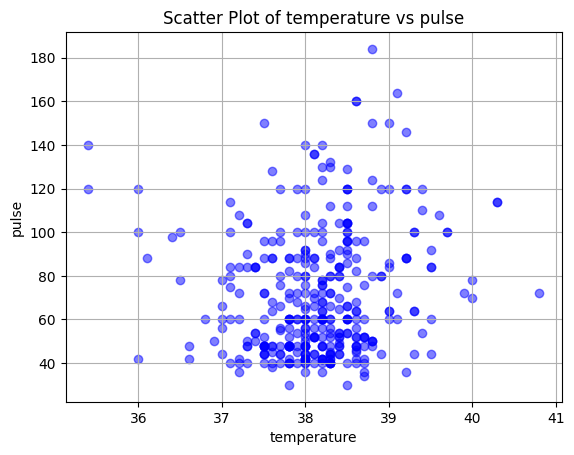

In [51]:
plt.scatter(df['rectal_temperature'], df['pulse'], color='blue', alpha=0.5)
plt.xlabel('temperature')
plt.ylabel('pulse')
plt.title(f'Scatter Plot of temperature vs pulse')
plt.grid(True)

plt.show()



plt.scatter(npy[:, 3], npy[:, 4], color='blue', alpha=0.5)
plt.xlabel('temperature')
plt.ylabel('pulse')
plt.title(f'Scatter Plot of temperature vs pulse')
plt.grid(True)

plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [52]:
x = df['rectal_temperature']
y = df['pulse']

pearson, _ = pearsonr(x, y)
spearman, _ = spearmanr(x, y)

print(f"Pearson coefficient: {pearson}")
print(f"Spearman coefficient: {spearman}")



print('\n')



x = npy[:, 3]
y = npy[:, 4]

pearson, _ = pearsonr(x, y)
spearman, _ = spearmanr(x, y)

print(f"Pearson coefficient: {pearson}")
print(f"Spearman coefficient: {spearman}")

Pearson coefficient: 0.12217493876850602
Spearman coefficient: 0.1605732628966047


Pearson coefficient: 0.12302445806147948
Spearman coefficient: 0.161888632197445


6. Провести One Hot Encoding категоріального string атрибуту.

In [53]:
mapping = {1: 'Normal', 2: 'Warm', 3: 'Cool', 4: 'Cold'}
df['temperature_of_extremities'] = df['temperature_of_extremities'].replace(mapping)

one_hot_encoded = pd.get_dummies(df['temperature_of_extremities'], prefix='temperature')
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

print(df_encoded)



text_values = np.vectorize(mapping.get)(npy[:, 6])

one_hot_encoded = np.zeros((len(npy), len(mapping)))
for i, value in enumerate(text_values):
    if value in mapping.values():
        index = list(mapping.values()).index(value)
        one_hot_encoded[i, index] = 1

npy_encoded = np.hstack((npy[:, :6], one_hot_encoded))

print(npy_encoded[:, -4:])

     surgery  age  hospital_number  rectal_temperature  pulse  \
3        1.0    9          5290409                39.1  164.0   
4        2.0    1           530255                37.3  104.0   
5        2.0    1           528355                37.3  104.0   
6        1.0    1           526802                37.9   48.0   
7        1.0    1           529607                37.9   60.0   
..       ...  ...              ...                 ...    ...   
363      2.0    1           529695                38.6   60.0   
364      2.0    1           528452                37.8   42.0   
365      1.0    1           534783                38.0   60.0   
366      2.0    1           528926                38.0   42.0   
367      2.0    1           530670                37.6   88.0   

     respiratory_rate temperature_of_extremities  peripheral_pulse  \
3                84.0                       Cold               1.0   
4                35.0                       Cold               1.0   
5        

7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі

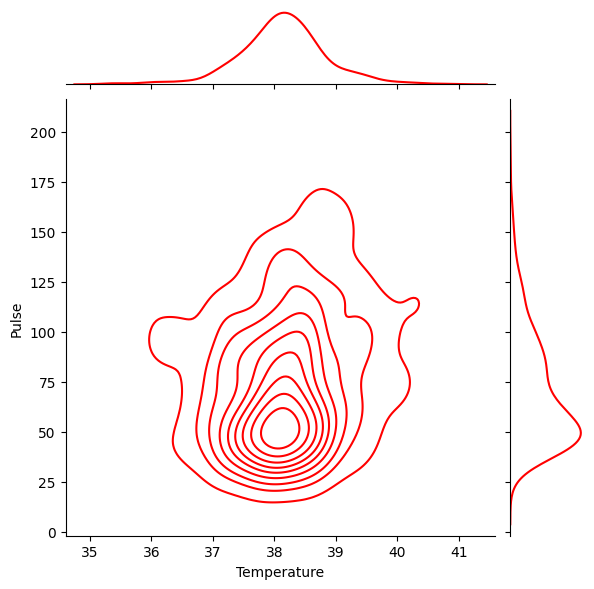

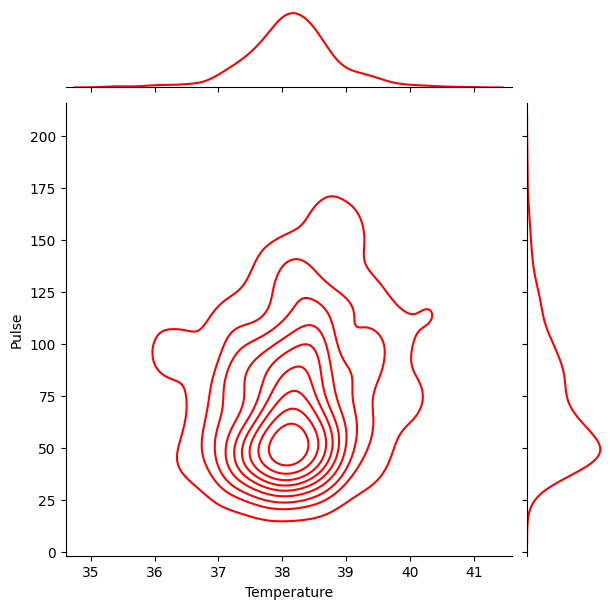

In [54]:
sns.jointplot(x=df['rectal_temperature'], y = df['pulse'], kind="kde", color='red')
plt.xlabel('Temperature')
plt.ylabel('Pulse')

plt.show()



sns.jointplot(x=npy[:, 3], y = npy[:, 4], kind="kde", color='red')
plt.xlabel('Temperature')
plt.ylabel('Pulse')

plt.show()